In [1]:
#Importing libraries for data analysis and visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # creating static, interactive, and animated visualizations
import seaborn as sns # built on Matplotlib, provides a high-level interface for statistical graphics
import hvplot.pandas #a high-level plotting API built on HoloViews for interactive visualizations
import calendar #useful calendar-related functions, such as converting numeric month values to month names or abbreviations.
import plotly.express as px # for interactive plots

In [3]:
#File path
data_path="C:/Users/User/Desktop/Delivers/New Delivers/Merged_Global_YouTube_and_Internet_Usage_Overview.csv"
#Load the Cleaned Dataset
data = pd.read_csv(data_path, encoding='ISO-8859-1')

In [5]:
# Convert created_month to numerical format for analysis
data['created_month'] = data['created_month'].apply(
    lambda x: list(calendar.month_abbr).index(x[:3]) if isinstance(x, str) else x
)

In [7]:
#Get an overview of the dataset's structure and key statistics
# Dataset structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     987 non-null    int64  
 1   Youtuber                                 987 non-null    object 
 2   subscribers                              987 non-null    int64  
 3   video views                              987 non-null    float64
 4   category                                 987 non-null    object 
 5   Title                                    987 non-null    object 
 6   uploads                                  987 non-null    int64  
 7   Country                                  987 non-null    object 
 8   channel_type                             987 non-null    object 
 9   video_views_rank                         987 non-null    float64
 10  country_rank                             987 non-n

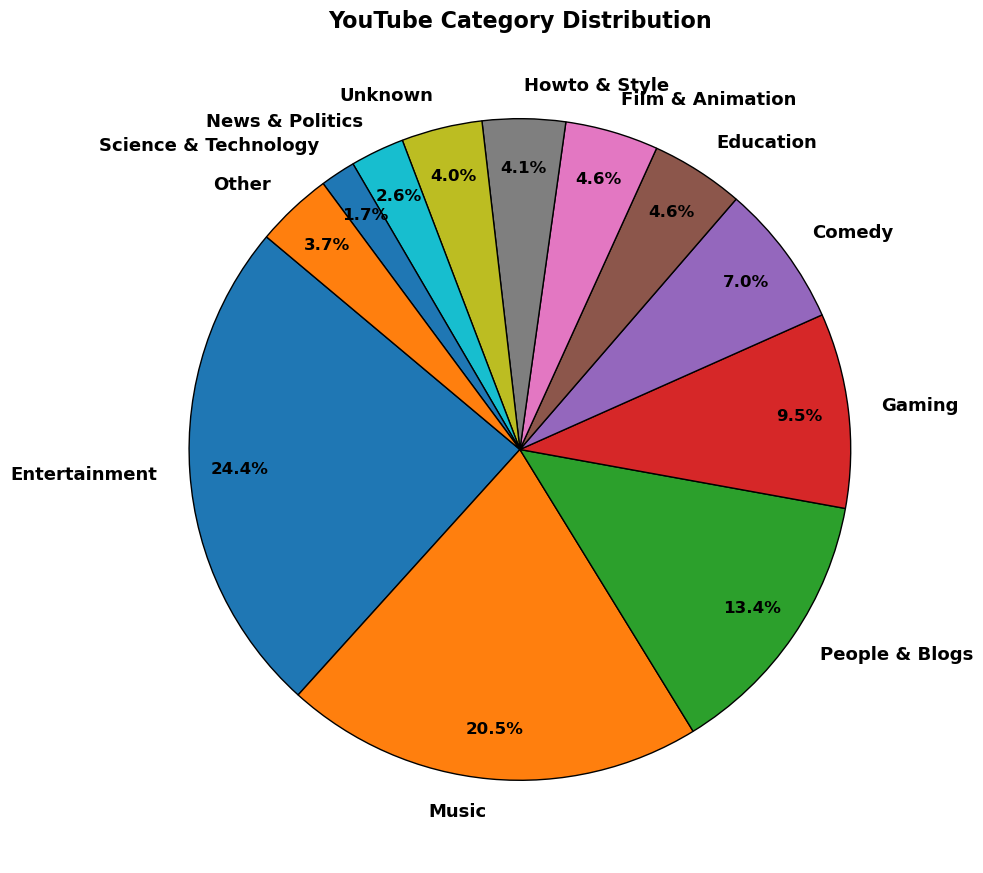

In [9]:
# Dataset Overview and Structure
# Pie Chart - YouTube category percentages

# Calculate category percentages
category_percentages = data['category'].value_counts(normalize=True) * 100

# Group smaller categories into "Other"
threshold = 1.5
category_percentages_grouped = category_percentages.copy()
small_categories = category_percentages[category_percentages < threshold]
category_percentages_grouped = category_percentages[category_percentages >= threshold]
category_percentages_grouped['Other'] = small_categories.sum()

# Plot the pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    category_percentages_grouped, 
    labels=category_percentages_grouped.index, 
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,  # Adjust position of percentage labels
    wedgeprops={
        'edgecolor': 'black',
        'linewidth': 1  # Add black border to wedges
    },
    textprops={
        'fontsize': 12,
        'fontweight': 'bold'
    }  # Make text bold and larger
)

# Improve label readability
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

# Add a title
plt.title('YouTube Category Distribution', fontsize=16, fontweight='bold')

# Remove default y-axis label
plt.ylabel('')

# Ensure layout is tight
plt.tight_layout()

# Save the figure
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/YouTube_category_percentages.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


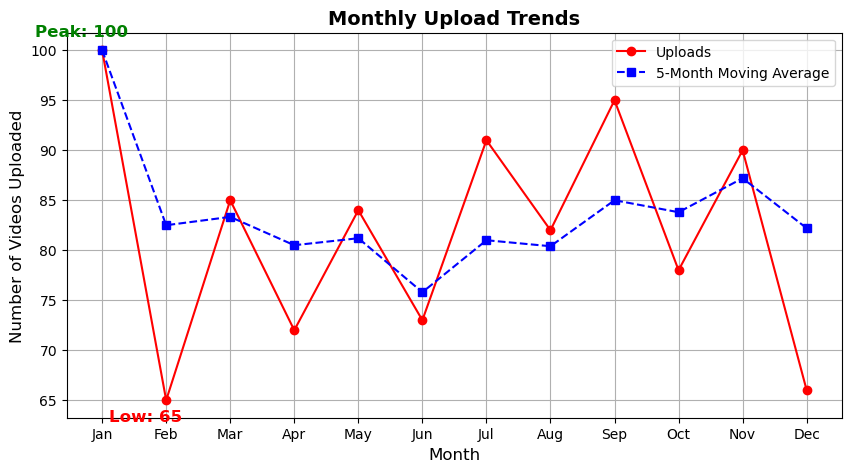

In [11]:
# Sample monthly uploads data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
uploads = [100, 65, 85, 72, 84, 73, 91, 82, 95, 78, 90, 66]

# Create DataFrame
df = pd.DataFrame({'Month': months, 'Uploads': uploads})
df['Month_Number'] = range(1, 13)

# Compute 5-month moving average
df['Moving_Avg'] = df['Uploads'].rolling(window=5, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Uploads'], 'ro-', label='Uploads')  # Red line with markers
plt.plot(df['Month'], df['Moving_Avg'], 'bs--', label='5-Month Moving Average')  # Blue dashed line

# Highlight peak and lowest points
max_index = df['Uploads'].idxmax()
min_index = df['Uploads'].idxmin()
plt.annotate(f"Peak: {df['Uploads'][max_index]}", 
             (df['Month'][max_index], df['Uploads'][max_index]), 
             textcoords="offset points", xytext=(-15,10), ha='center', color='green', fontsize=12, fontweight='bold')

plt.annotate(f"Low: {df['Uploads'][min_index]}", 
             (df['Month'][min_index], df['Uploads'][min_index]), 
             textcoords="offset points", xytext=(-15,-15), ha='center', color='red', fontsize=12, fontweight='bold')

# Labels and Title
plt.title('Monthly Upload Trends', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Videos Uploaded', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid()

# Save the updated plot
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/refined_monthly_upload_trends2.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


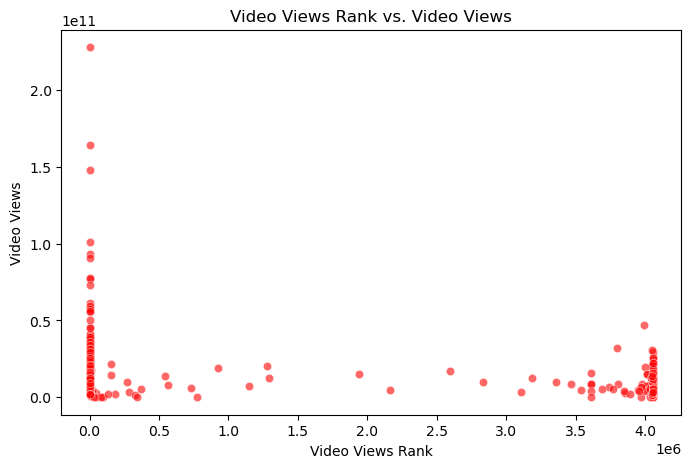

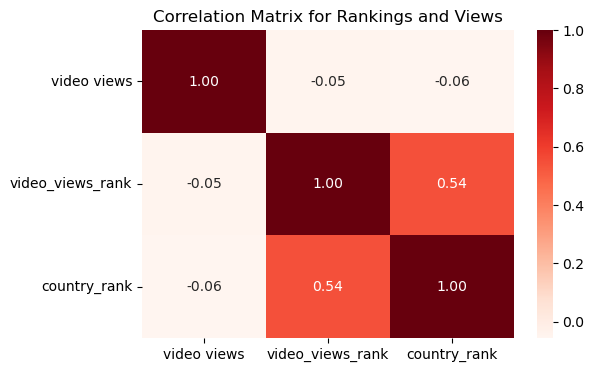

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for video views rank vs. video views
plt.figure(figsize=(8, 5))
sns.scatterplot(x='video_views_rank', y='video views', data=data, color='red', alpha=0.6)
plt.title('Video Views Rank vs. Video Views')
plt.xlabel('Video Views Rank')
plt.ylabel('Video Views')

# Save the scatter plot
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/video_views_rank_vs_video_viewsf.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = data[['video views', 'video_views_rank', 'country_rank']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")  # Reds colormap
plt.title('Correlation Matrix for Rankings and Views')

# Save the heatmap
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/correlation_matrix_rankings_viewsf.png', dpi=300, bbox_inches='tight')
plt.show()

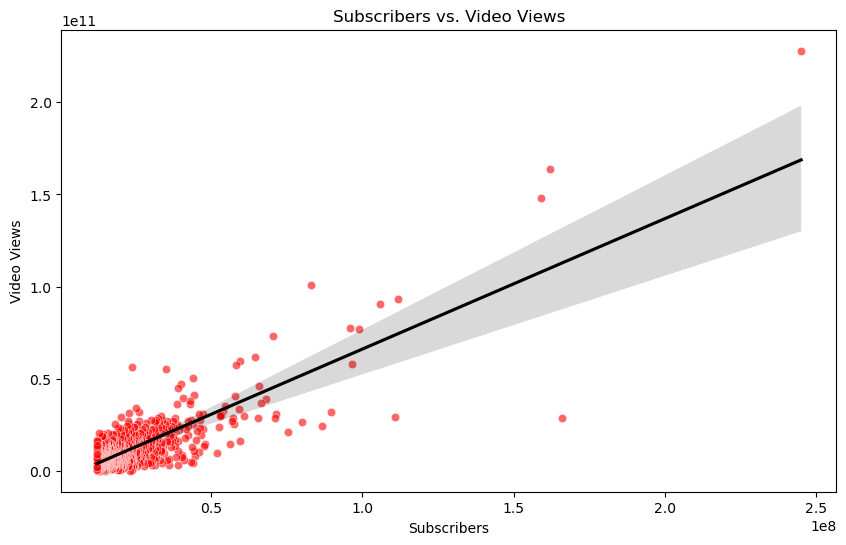

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=data, color='red', alpha=0.6)

# Add regression line (optional)
sns.regplot(x='subscribers', y='video views', data=data, scatter=False, color='black')

plt.title('Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/subscribers_vs_video_viewsf.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


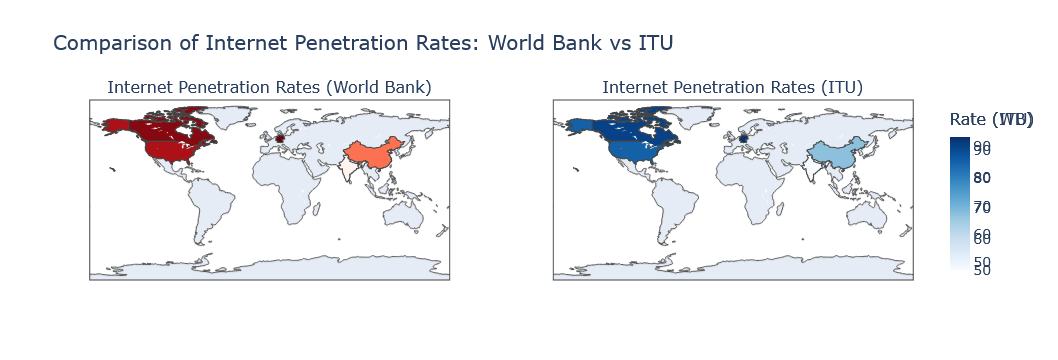

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Example Data (Replace with your actual dataset)
countries = ['USA', 'Canada', 'Germany', 'India', 'China']
wb_rates = [88, 92, 95, 47, 70]  # World Bank Data
itu_rates = [85, 90, 93, 50, 68]  # ITU Data

diff_rates = [wb - itu for wb, itu in zip(wb_rates, itu_rates)]  # Difference WB - ITU

# Create subplot with 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        "Internet Penetration Rates (World Bank)", 
        "Internet Penetration Rates (ITU)"
    ),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]],
    horizontal_spacing=0.1  # Increase spacing between subplots
)

# World Bank Choropleth
fig.add_trace(
    go.Choropleth(
        locations=countries,
        z=wb_rates,
        locationmode='country names',
        colorscale='Reds',
        colorbar=dict(
            title="Rate (WB)",  
            titlefont=dict(size=16),  # Larger title font
            tickfont=dict(size=14),  # Larger tick labels
            thickness=20  # Increase colorbar width
        )
    ), row=1, col=1
)

# ITU Choropleth
fig.add_trace(
    go.Choropleth(
        locations=countries,
        z=itu_rates,
        locationmode='country names',
        colorscale='Blues',
        colorbar=dict(
            title="Rate (ITU)",  
            titlefont=dict(size=16),  # Larger title font
            tickfont=dict(size=14),  # Larger tick labels
            thickness=20  # Increase colorbar width
        )
    ), row=1, col=2
)

# Layout adjustments
fig.update_layout(
    title_text="Comparison of Internet Penetration Rates: World Bank vs ITU",
    title_font=dict(size=20),  # Larger title for better readability
    showlegend=False
)

fig.show()


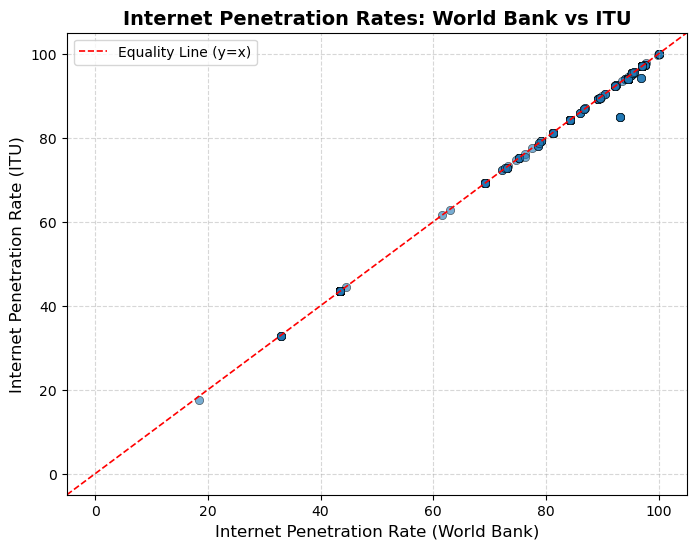

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(
    x=data['Rate (WB)'], 
    y=data['Rate (ITU)'], 
    edgecolor='k', 
    alpha=0.6
)

# Add reference line (y = x)
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=1.2, label="Equality Line (y=x)")

# Titles and labels
plt.title('Internet Penetration Rates: World Bank vs ITU', fontsize=14, fontweight='bold')
plt.xlabel('Internet Penetration Rate (World Bank)', fontsize=12)
plt.ylabel('Internet Penetration Rate (ITU)', fontsize=12)

# Grid and formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()

# Save high-resolution images
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/Penetration_Ratesf.png', dpi=300, bbox_inches='tight')  # PNG
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/Penetration_Ratesf.svg', bbox_inches='tight')  # SVG for Word compatibility

# Show plot
plt.show()


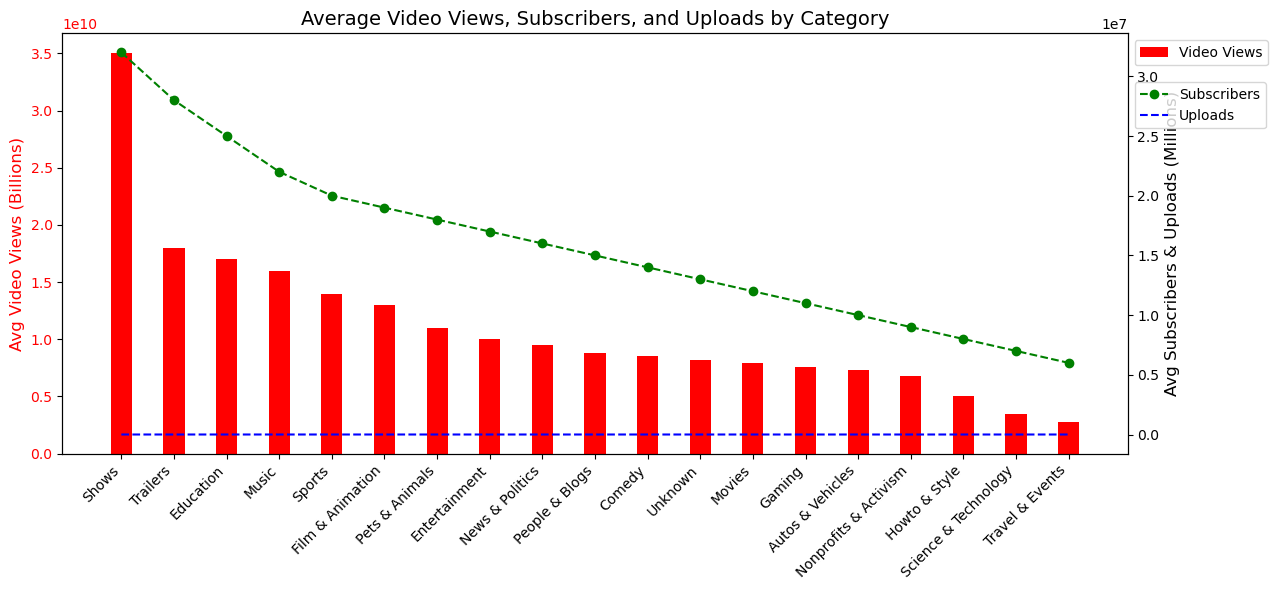

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Sample category statistics (replace with your actual data)
category_stats = {
    'Shows': [3.5e10, 3.2e7, 500],
    'Trailers': [1.8e10, 2.8e7, 450],
    'Education': [1.7e10, 2.5e7, 400],
    'Music': [1.6e10, 2.2e7, 350],
    'Sports': [1.4e10, 2.0e7, 300],
    'Film & Animation': [1.3e10, 1.9e7, 280],
    'Pets & Animals': [1.1e10, 1.8e7, 260],
    'Entertainment': [1.0e10, 1.7e7, 240],
    'News & Politics': [9.5e9, 1.6e7, 220],
    'People & Blogs': [8.8e9, 1.5e7, 200],
    'Comedy': [8.5e9, 1.4e7, 180],
    'Unknown': [8.2e9, 1.3e7, 160],
    'Movies': [7.9e9, 1.2e7, 140],
    'Gaming': [7.6e9, 1.1e7, 120],
    'Autos & Vehicles': [7.3e9, 1.0e7, 100],
    'Nonprofits & Activism': [6.8e9, 9e6, 90],
    'Howto & Style': [5.0e9, 8e6, 80],
    'Science & Technology': [3.5e9, 7e6, 70],
    'Travel & Events': [2.8e9, 6e6, 60]
}

# Convert dictionary to numpy arrays
categories = list(category_stats.keys())
views = [v[0] for v in category_stats.values()]
subscribers = [v[1] for v in category_stats.values()]
uploads = [v[2] for v in category_stats.values()]

# Bar width
bar_width = 0.4
x = np.arange(len(categories))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Video Views)
ax1.bar(x, views, color='#FF0000', width=bar_width, label='Video Views')
ax1.set_ylabel('Avg Video Views (Billions)', color='#FF0000', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#FF0000')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)

# Second y-axis (Subscribers & Uploads)
ax2 = ax1.twinx()
ax2.plot(x, subscribers, color='green', marker='o', linestyle='dashed', label='Subscribers')
ax2.plot(x, uploads, color='blue', linestyle='dashed', label='Uploads')
ax2.set_ylabel('Avg Subscribers & Uploads (Millions)', fontsize=12)
ax2.tick_params(axis='y')

# Titles & Legends
plt.title('Average Video Views, Subscribers, and Uploads by Category', fontsize=14)
fig.tight_layout()
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/category_engagementf.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


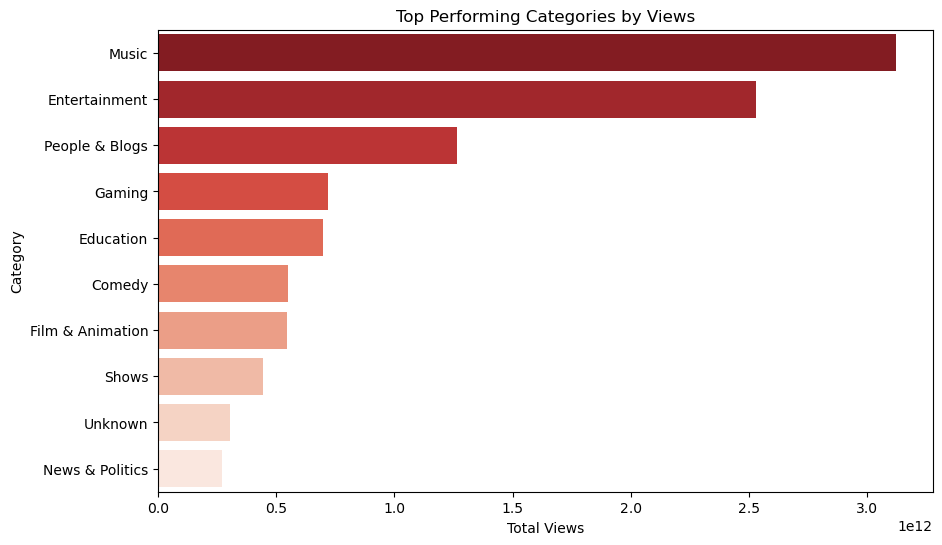

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum views by category and reset index
top_categories = data.groupby('category', as_index=False)['video views'].sum().sort_values(by='video views', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_categories['category'].head(10), 
            x=top_categories['video views'].head(10), 
            hue=top_categories['category'].head(10),  # Assigning hue
            dodge=False,  # Ensuring no bars are grouped
            palette='Reds_r', 
            legend=False)  # Disabling legend since hue is just for color

plt.title('Top Performing Categories by Views')
plt.xlabel('Total Views')
plt.ylabel('Category')

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/top_categories_by_views.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

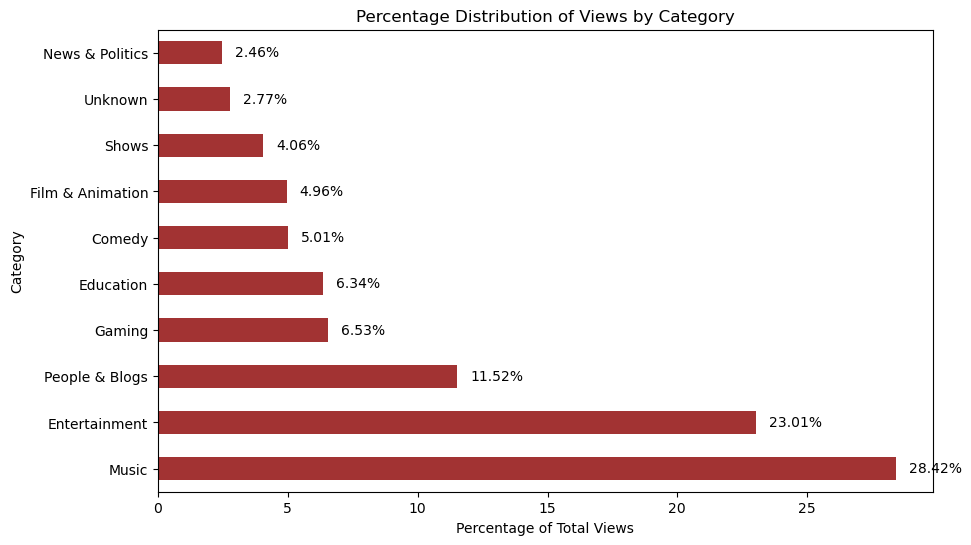

In [25]:
import matplotlib.pyplot as plt

# Calculate total views for each category
category_views = data.groupby('category')['video views'].sum()

# Convert to percentage
category_percentage = (category_views / category_views.sum()) * 100

# Sort values in descending order
category_percentage = category_percentage.sort_values(ascending=False)

# Plot the percentage distribution as a pie chart
plt.figure(figsize=(10, 6))
category_percentage.head(10).plot(kind='barh', color='darkred', alpha=0.8)
plt.title('Percentage Distribution of Views by Category')
plt.xlabel('Percentage of Total Views')
plt.ylabel('Category')

# Display values on bars
for index, value in enumerate(category_percentage.head(10)):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

# Save the chart
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/category_percentage_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


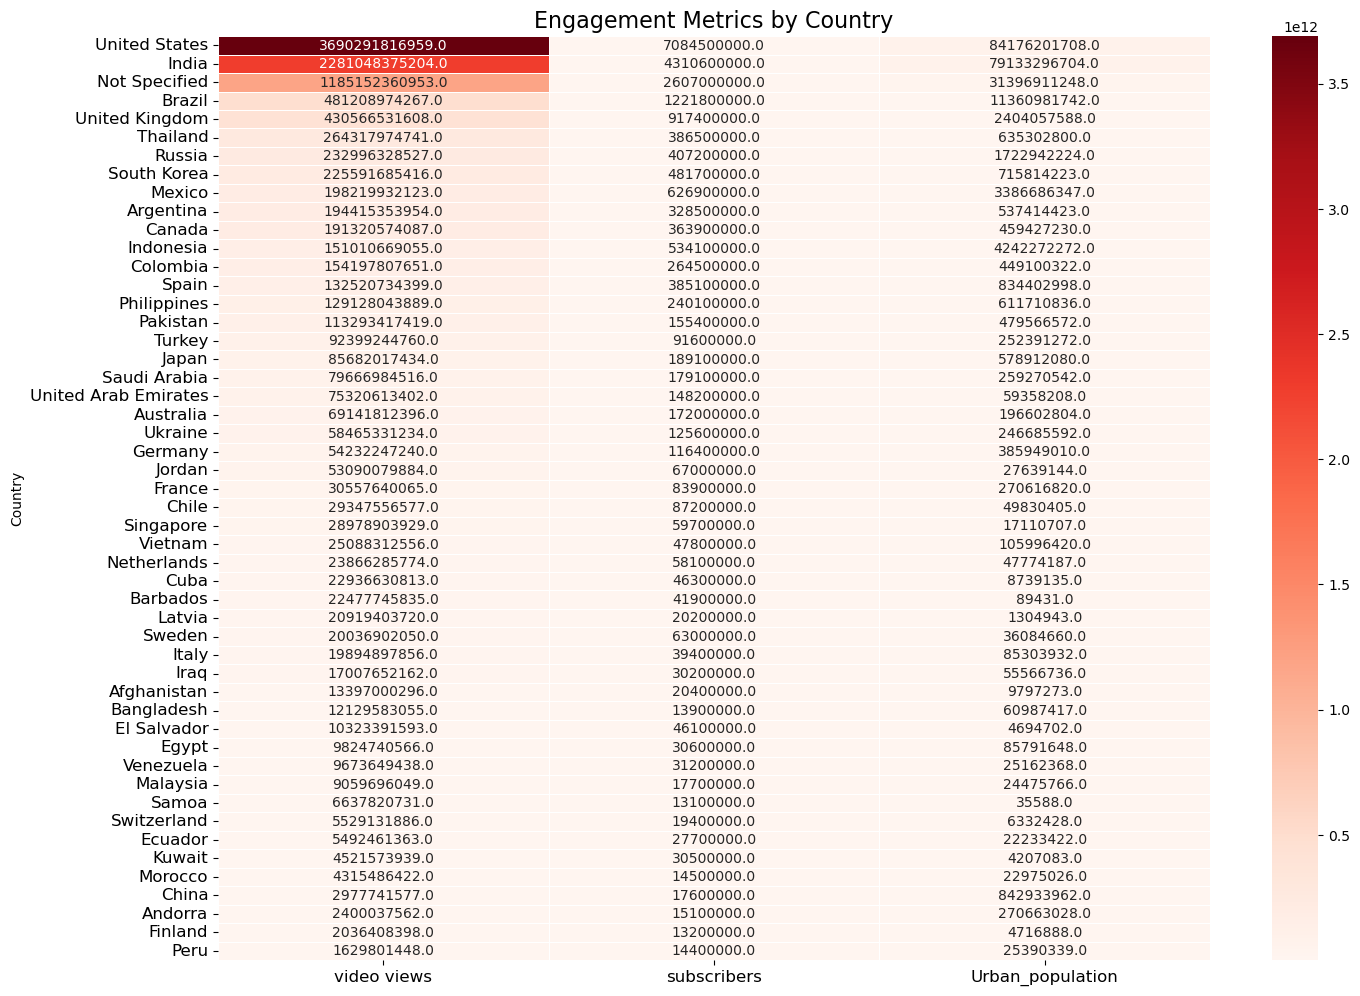

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Aggregate engagement metrics by country (using sum instead of mean)
country_stats = data.groupby('Country')[['video views', 'subscribers', 'Urban_population']].sum()

# Add a column for total engagement to order countries
country_stats['total_engagement'] = country_stats.sum(axis=1)

# Sort in descending order
country_stats = country_stats.sort_values('total_engagement', ascending=False)

# Drop the total_engagement column before plotting
country_stats = country_stats.drop(columns='total_engagement')

# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(country_stats, annot=True, fmt=".1f", cmap="Reds", linewidths=.5, annot_kws={"size": 10})
plt.title('Engagement Metrics by Country', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot
plt.savefig('C:/Users/User/Desktop/My_project/EDA_Vis/engagement_by_countries_descendingkf.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()